In [1]:
# Before I start, I just wanted to thank TechPoint for the opportunity to
# apply for these roles and analyze this data set. While I am still very 
# novice at this discipline, I am highly passionate about the field, and 
# find great joy in applying these strategies on interesting real world problems.

In [2]:
# import libraries and data
import pandas as pd
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Xtern.csv")

df.head()

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


In [3]:
# check for null values
df.isnull().sum()

scooter_id     0
xcoordinate    0
ycoordinate    0
power_level    0
dtype: int64

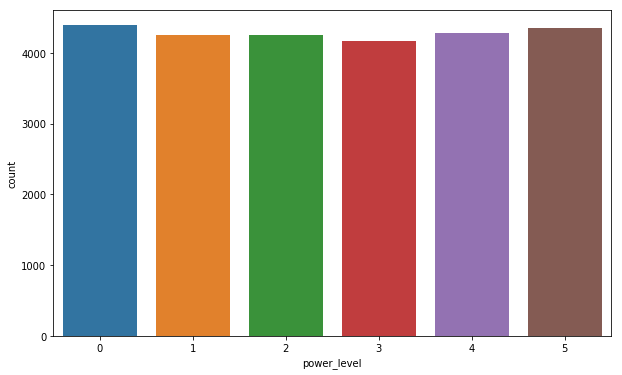

In [4]:
# check battery level distribution
# battery level seems to be pretty evenly distributed 
plt.figure(figsize=(10,6))
sns.countplot(df["power_level"])

In [5]:
# create visualization fuctions
# functions display a heat map where low pop is blue and high pop is yellow
def show_heat(df):
    x = df["xcoordinate"].to_numpy()
    y = df["ycoordinate"].to_numpy()

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=130)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.show()
    
def loop_show_heat(df):
    for i in range(6):
        print("power level: " + str(i))
        show_heat(df[df["power_level"] == i])

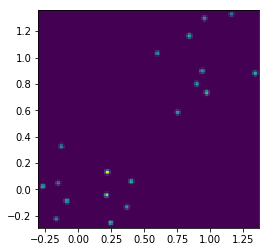

In [6]:
# visualize full data set as heat map
# notice excess darkness in top left and bottom right quadrants
show_heat(df)

In [7]:
# beg the question how many scooters are in the top left and bottom right quadrants
df_bottom_right = df[(df["ycoordinate"] < .5) & (df["xcoordinate"] > .5)]
print("total scooters in bottom right quadrant: " + str(len(df_bottom_right)))


df_up_left = df[(df["ycoordinate"] > .5) & (df["xcoordinate"] < .5)]
print("total scooters in top left quadrant: " + "\t " + str(len(df_up_left)))

total scooters in bottom right quadrant: 0
total scooters in top left quadrant: 	 0


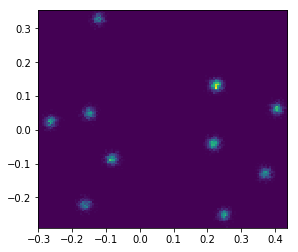

In [8]:
# get a closer look at the bottom left quadrant
df_bottom_left = df[(df["ycoordinate"] < .5) & (df["xcoordinate"] < .5)]

show_heat(df_bottom_left[df_bottom_left["power_level"] < 4])

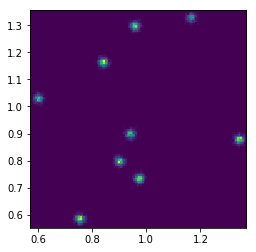

In [9]:
# get a closer look at the top right quadrant
df_top_right = df[(df["ycoordinate"] > .5) & (df["xcoordinate"] > .5)]

show_heat(df_top_right[df_top_right["power_level"] < 4])

power level: 0


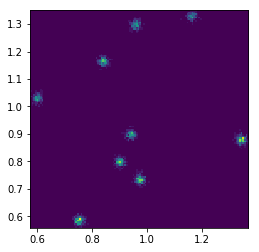

power level: 1


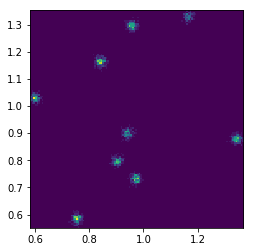

power level: 2


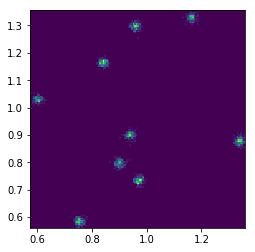

power level: 3


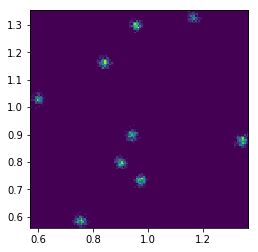

power level: 4


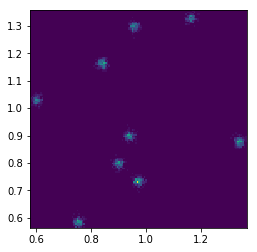

power level: 5


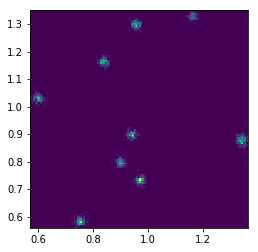

In [10]:
# isolate each power level of the top right quadrant
loop_show_heat(df_top_right)

power level: 0


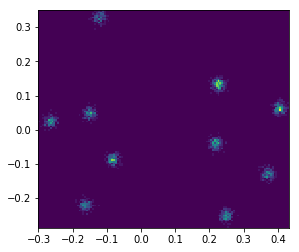

power level: 1


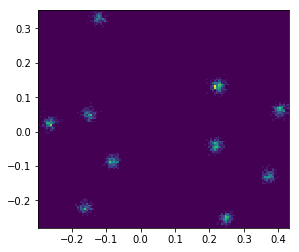

power level: 2


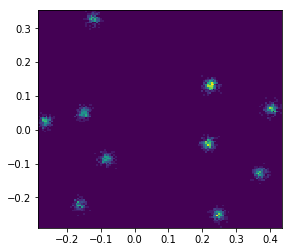

power level: 3


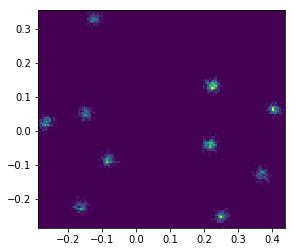

power level: 4


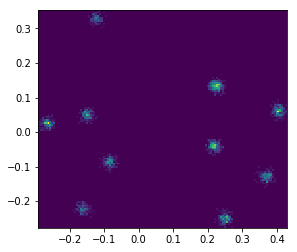

power level: 5


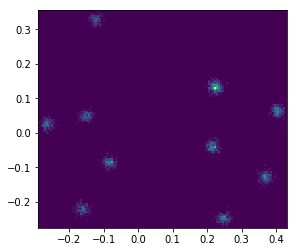

In [11]:
# isolate each power level of the bottom left quadrant
loop_show_heat(df_bottom_left)

In [12]:
# Above, I noticed fluctuations in population density given different
# power levels, it would be interesting to determine which cities
# have the hightest ratio of empty scooters.
#
# example of how to get the "empty ratio" for each city

# group the city into a single data frame
df_city_1 = df[((df["xcoordinate"] > .1) & (df["xcoordinate"] < .3)) & ((df["ycoordinate"] > .1) & (df["ycoordinate"] < .2))]

# divide the number of empty scooters by the total number of scooters in the city
empty_ratio_city_1 = int(len(df_city_1[df_city_1["power_level"] < 2]) * 100 / len(df_city_1))

print("percent of scooters that are empty in this city: " + str(empty_ratio_city_1) + "%")

percent of scooters that are empty in this city: 33%


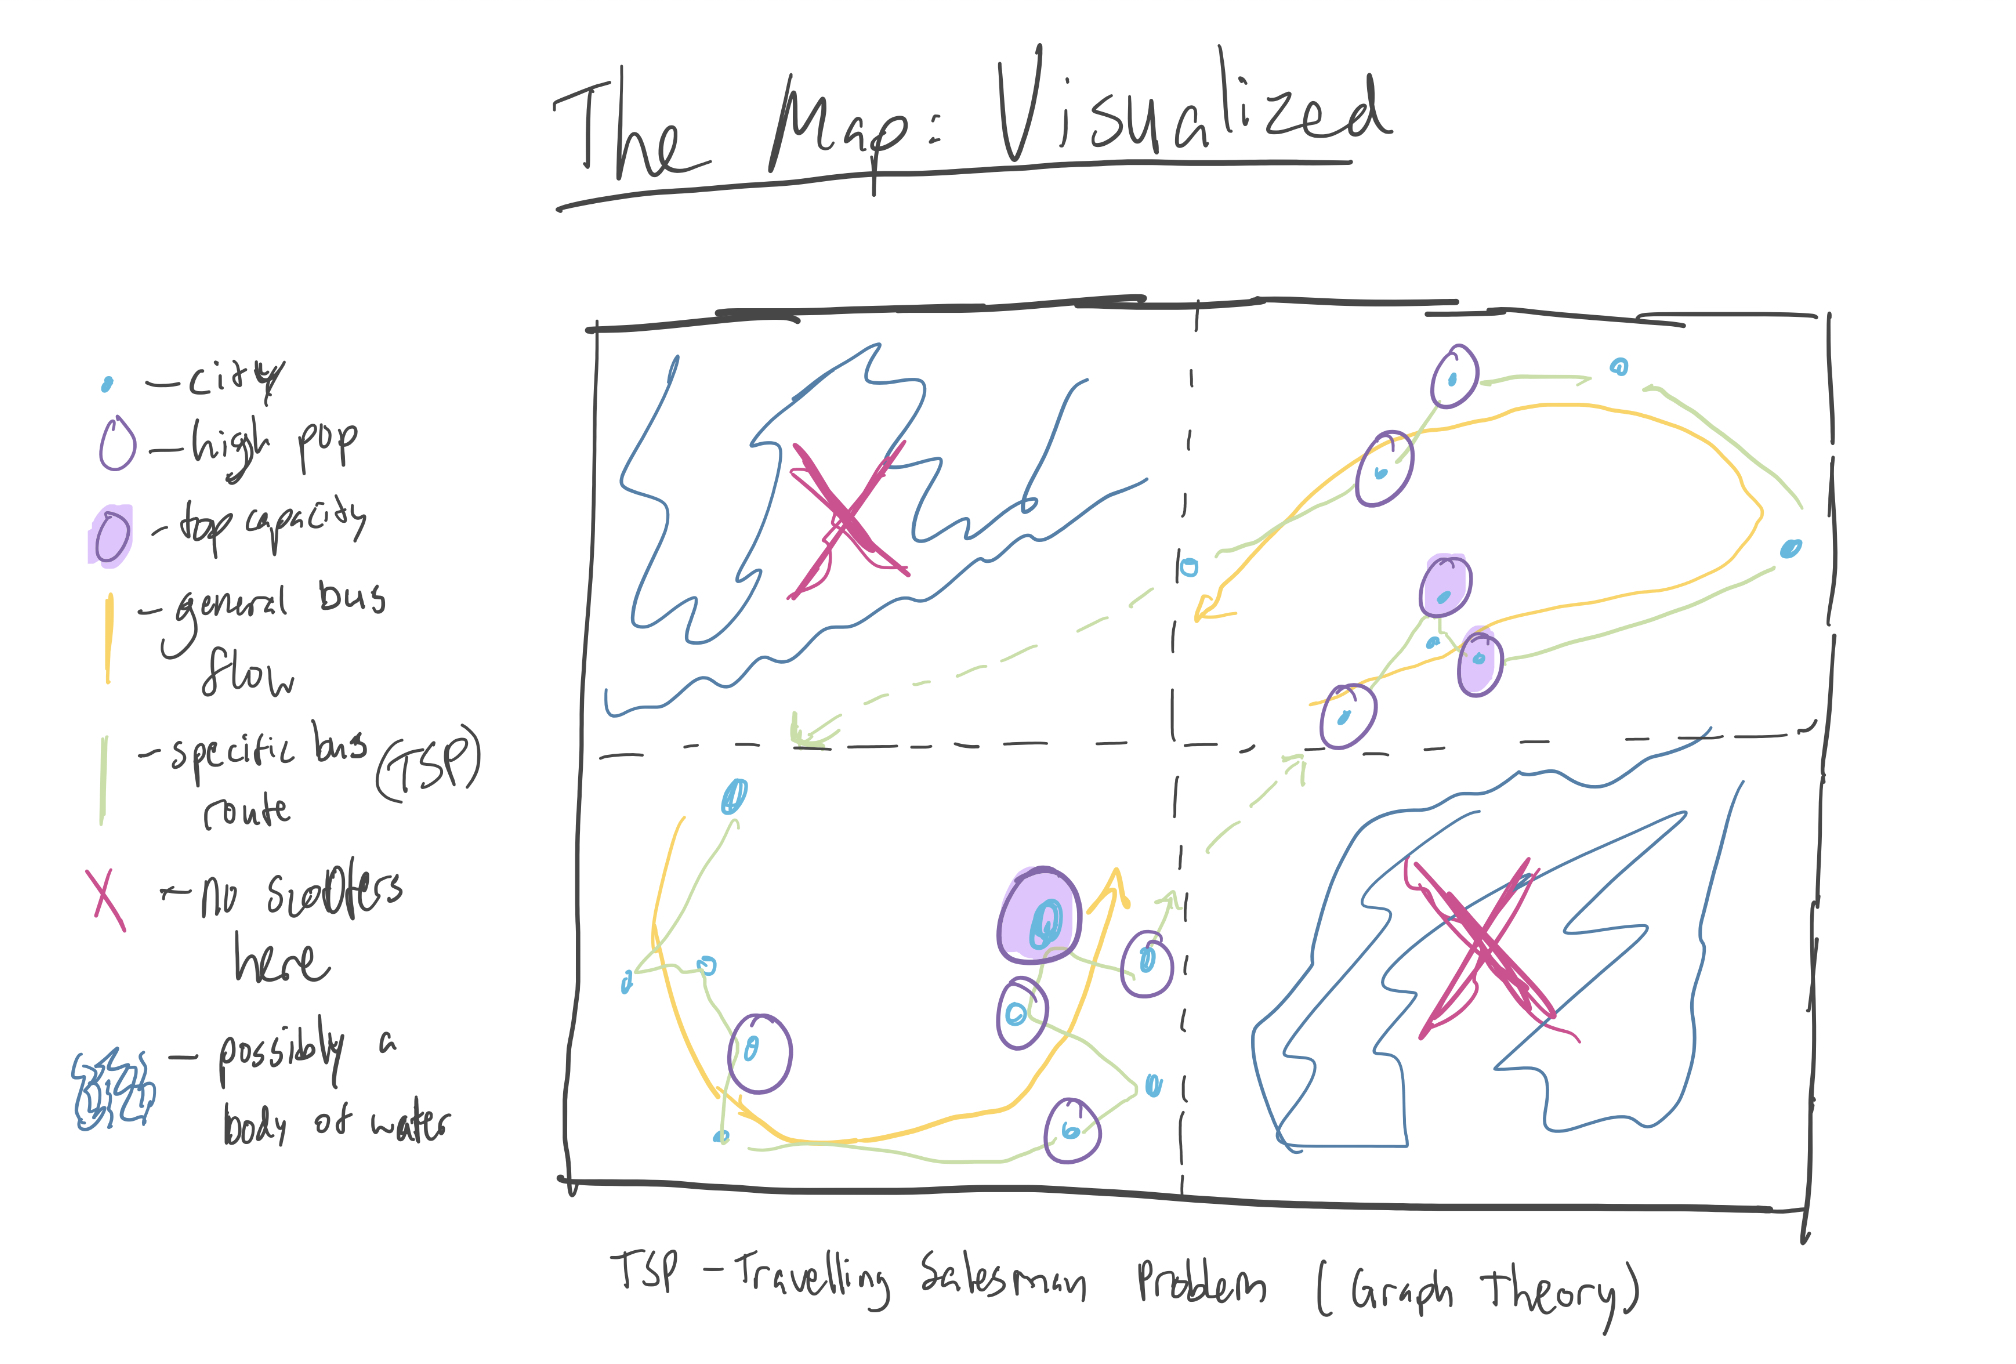

In [13]:
# assumptions:
# max bus capacity is 100 scooter
# bus can drive while charging scooters
# the bus can drive and pick up scooters
# bus is solar powered and does not need to recharge
# bus is self driving and does not need to "change opperators" at a station
# bus does not need to attend regular mantenance
# with respect to the TSP, length in distance is eqivalent to length in time


# Most popular scooter locations:
# By far, the two most popular scooter locations seem to be the upper right quadrant/corner, 
# and the lower left quadrant/corner, given that the other two corners were entirely empty. 
# The empty corners could be a body of water of some kind.


# Time-cost analysis for recharging empty scooters(power level 0 or 1):
# If a bus can charge 100 scooters in 5 hours, then it will take roughly 200 hours
# to charge all 4000 empty scooters in each corner.
#
# Given there are only 2 corners populated with 4000 scooters each, 
# this opperation will take roughly 400 hours to accomplish,
# one could also add a few more hours for traveling cost to get 
# from one corner to the other.


# Next steps:
#   Locations in need of recharging most:
#      To understand which areas have the greatest ratios of empty scooters to total scooters,
#      I think it would be nice to group together each scooter cluster
#      and divide the subset of empty scooters by total scooters for each cluster.
#      Areas with higher empty ratios could be prioritized for recharging first.
#
#      The implementation is demonstrated above the map, for a single city.
#
#      If someone then sorted and reversed the list of empty ratios, 
#      the cities/areas at the front of the list
#      would be the cities most in need of recharging.